# Air Quality Data Set Analysis

## Data Description

The Air Quality Data Set was obtained from the [University of California - Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/00360/)

**Data Set Information:**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value.

**Attribute Information:**

| Index | Column Name | Description | Units |
|:---: | :--- | :--- | :---: |
| 0 | Date | (DD/MM/YYYY) |
| 1 | Time | (HH.MM.SS) |
| 2 | CO(GT) | True hourly averaged concentration CO (reference analyzer) | $\frac{mg}{m^{3}}$ |
| 3 | PT08.S1(CO) | Tin oxide. Hourly averaged sensor response (nominally CO targeted) | |
| 4 | NMHC(GT) | Non Metanic HydroCarbons concentration. True hourly averaged overall (reference analyzer) | $\frac{\mu g}{m^{3}}$ |
| 5 | C6H6(GT) | True hourly averaged Benzene concentration (reference analyzer) | $\frac{\mu g}{m^{3}}$ |
| 6 | PT08.S2(NMHC) | Titania. Hourly averaged sensor response (nominally NMHC targeted) | | 
| 7 | 'NOx(GT)' | True hourly averaged NOx concentration (reference analyzer) | ppb |
| 8 | PT08.S3(NOx) | Tungsten oxide. Hourly averaged sensor response (nominally NOx targeted) | |
| 9 | 'NO2(GT)' | True hourly averaged NO2 concentration (reference analyzer) | $\frac{\mu g}{m^{3}}$ |
| 10 | PT08.S4(NO2) | Tungsten oxide. Hourly averaged sensor response (nominally NO2 targeted) | |
| 11 | PT08.S5(O3) | Indium oxide. Hourly averaged sensor response (nominally O3 targeted) | |
| 12 | T | Temperature | °C |
| 13 | RH | Relative Humidity | (%) | 
| 14 | AH | Absolute Humidity | |

**Citation:**

S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005.

## Main Objective

To find the linear regression with the best performance that models the **Absolute Humidity** as the outcome and the rest of the features as the predictors.

### Secondary Objective

Find a satisfactory interpretation of the relation between the predictors and the outcome.

## Data Loading

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('AirQualityUCI.csv', sep = ';')

## Data Cleaning

### Heading

In [3]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [4]:
data.shape

(9471, 17)

The last two columns are empty and were not registered in the data descrption by the source. They will be eliminated.

In [5]:
df = data.loc[:, data.columns[0:15]]

In [6]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


### Duplicates

In [7]:
df.index.is_unique

True

In [8]:
df.duplicated().sum()

113

In [9]:
(113/9471)*100

1.193115827262169

The duplicated rows are empty and represent only the 1.2% of the data. They will be removed.

In [10]:
df = df.drop_duplicates()

### Missing Values

In [11]:
df.isnull().sum()

Date             1
Time             1
CO(GT)           1
PT08.S1(CO)      1
NMHC(GT)         1
C6H6(GT)         1
PT08.S2(NMHC)    1
NOx(GT)          1
PT08.S3(NOx)     1
NO2(GT)          1
PT08.S4(NO2)     1
PT08.S5(O3)      1
T                1
RH               1
AH               1
dtype: int64

In [12]:
import numpy as np

In [13]:
nan_idx = np.unique(np.where(df.isnull())[0])
nan_idx

array([9357], dtype=int64)

There is one row with missing values in all columns. It will be removed

In [14]:
df = df.dropna()

### Data Types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


- **Date** and **Time** should be combined and reformatted into 'datetime'. 
- The rest of the features should be float64 because they are measurements with at least decimal significant value.

#### Date / Time

In [16]:
df['Date'] = df['Date'].apply(lambda x: x.replace('/', '-'))
df['Time'] = df['Time'].apply(lambda x: x.replace('.', ':'))

In [17]:
date_time = df[['Date', 'Time']].apply(lambda x: ' '.join(x), axis=1)
df['DateTime'] = pd.to_datetime(date_time)

In [18]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10-03-2004,18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-10-03 18:00:00
1,10-03-2004,19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-10-03 19:00:00
2,10-03-2004,20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-10-03 20:00:00
3,10-03-2004,21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-10-03 21:00:00
4,10-03-2004,22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-10-03 22:00:00


#### Floats

In [19]:
should_be_floats = [i for i in df.columns if (i not in ['Date', 'Time', 'DateTime']) & (df[i].dtype == 'O')]
df[should_be_floats].head()

,CO(GT),C6H6(GT),T,RH,AH
0,"2,6","11,9","13,6","48,9","0,7578"
1,2,"9,4","13,3","47,7","0,7255"
2,"2,2","9,0","11,9","54,0","0,7502"
3,"2,2","9,2","11,0","60,0","0,7867"
4,"1,6","6,5","11,2","59,6","0,7888"


Both commas and dots are used to separate decimals. It should be formatted to only dots.

In [20]:
for i in should_be_floats:
    df[i] = df[i].apply(lambda x: x.replace(',', '.'))
    df[i] = df[i].apply(pd.to_numeric)

#### Final Table

The columns **Date** and **Time** are excluded as their data is included in the new feature **DateTime**. The remaining columns reorganized.

In [21]:
floats = df.select_dtypes(include=['float64']).columns.tolist()
columns = ['DateTime']
columns.extend(floats)
df = df[columns]

In [22]:
df.head()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Negative Values

In [23]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


- Negative values in **CO(GT)**, **NMHC(GT)**, **C6H6(GT)**, **NOx(GT)**, **NO2(GT)**, **RH**, **AH** do not make sense.
- Values below -50 in **T** do not make sense.
- Replacing these outliers with the median would introduce undesirable bias.
- The best option is to delete the negative values.

#### Identifying and removing negative values

In [24]:
negative_idx = {} # Dictionary with column name and index of the negative values
negative_n = {} # Dictionary with column name number of negative values

positive_measurements = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'RH', 'AH']

for i in positive_measurements:
    mask = df[i] < 0
    idx = df[mask].index.tolist()
    if len(idx) != 0:
        negative_idx[i] = idx
        negative_n[i] = len(idx)

In [25]:
negative_n

{'CO(GT)': 1683,
 'NMHC(GT)': 8443,
 'C6H6(GT)': 366,
 'NOx(GT)': 1639,
 'NO2(GT)': 1642,
 'RH': 366,
 'AH': 366}

##### Removing **NMHC(GT)**

In [26]:
(negative_n['NMHC(GT)']/df.shape[0])*100 

90.23191193758683

- 90.2% of the values of **NMHC(GT)** are invalid.
- Deleting the rows is not an option, Too much data would be lost.
- **NMHC(GT)** has, at best, a very weak correlation with the other features. Creating a prediction model to replace those values, at this stage of the project is not feasable.
- The best option is to delete the column.

In [27]:
df = df.drop('NMHC(GT)', axis=1)

##### Removing negative observations of **AH**

In [28]:
(negative_n['AH']/df.shape[0])*100 

3.9115100993908305

- The negative values in the target feature only represent 3.9% of the dataset.
- Replacing them with a statistic would introduce undesirable bias.
- The best option is to delete those observations.

In [29]:
df = df.drop(negative_idx['AH'], axis=0)

In [30]:
negative_idx = {} # Dictionary with column name and index of the negative values
negative_n = {} # Dictionary with column name number of negative values

positive_measurements.remove('NMHC(GT)')

for i in positive_measurements:
    mask = df[i] < 0
    idx = df[mask].index.tolist()
    if len(idx) != 0:
        negative_idx[i] = idx
        negative_n[i] = len(idx)

In [31]:
negative_n

{'CO(GT)': 1647, 'NOx(GT)': 1595, 'NO2(GT)': 1598}

##### Replacing negative values in **CO(GT)**, **NOx(GT)**, **NO2(GT)** with median

In [32]:
for i in negative_n.keys():
    median = df[i].median()
    df.loc[negative_idx[i], i] = median

##### Temperatures below -50°C

In [33]:
df[df['T'] < -50]

,DateTime,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH


There are **0** remaining observations with registered temperatures below -50°C

### Log Transformation

#### Calculating Skewness

In [34]:
floats = df.select_dtypes(include=['float64']).columns.tolist()

In [35]:
skewness = {i:df[i].skew() for i in floats if abs(df[i].skew()) > 0.5}
skewness

{'CO(GT)': 1.6687519220573899,
 'PT08.S1(CO)': 0.7559073723626715,
 'C6H6(GT)': 1.3615322700276489,
 'PT08.S2(NMHC)': 0.5615659799854548,
 'NOx(GT)': 2.0106618315663116,
 'PT08.S3(NOx)': 1.1017292354429786,
 'NO2(GT)': 0.802537482547839,
 'PT08.S5(O3)': 0.627864497563846}

The skewness of some of the features can be improved with a logarithmic transformation

#### Transformation

In [36]:
log_cols = []
for i in skewness:
    x = i + '_log'
    df[x] = np.log(df[i])
    log_cols.append(x)

In [37]:
df = df.drop(skewness.keys(), axis=1)

In [38]:
cols = ['DateTime']
cols.extend(log_cols)
cols.extend(['PT08.S4(NO2)', 'T', 'RH', 'AH'])

In [39]:
df = df[cols]

In [40]:
floats = df.select_dtypes(include=['float64']).columns.tolist()

In [41]:
df.head()

,DateTime,CO(GT)_log,PT08.S1(CO)_log,C6H6(GT)_log,PT08.S2(NMHC)_log,NOx(GT)_log,PT08.S3(NOx)_log,NO2(GT)_log,PT08.S5(O3)_log,PT08.S4(NO2),T,RH,AH
0,2004-10-03 18:00:00,0.955511,7.215240,2.476538,6.952729,5.111988,6.962243,4.727388,7.145196,1692.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,0.693147,7.163947,2.240710,6.861711,4.634729,7.068172,4.521789,6.879356,1559.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,0.788457,7.245655,2.197225,6.844815,4.875197,7.038784,4.736198,6.979145,1555.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,0.788457,7.226936,2.219203,6.854355,5.147494,6.995766,4.804021,7.092574,1584.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,0.470004,7.148346,1.871802,6.728629,4.875197,7.094235,4.753590,7.012115,1490.0,11.2,59.6,0.7888


#### Feature Distribution Visualization

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

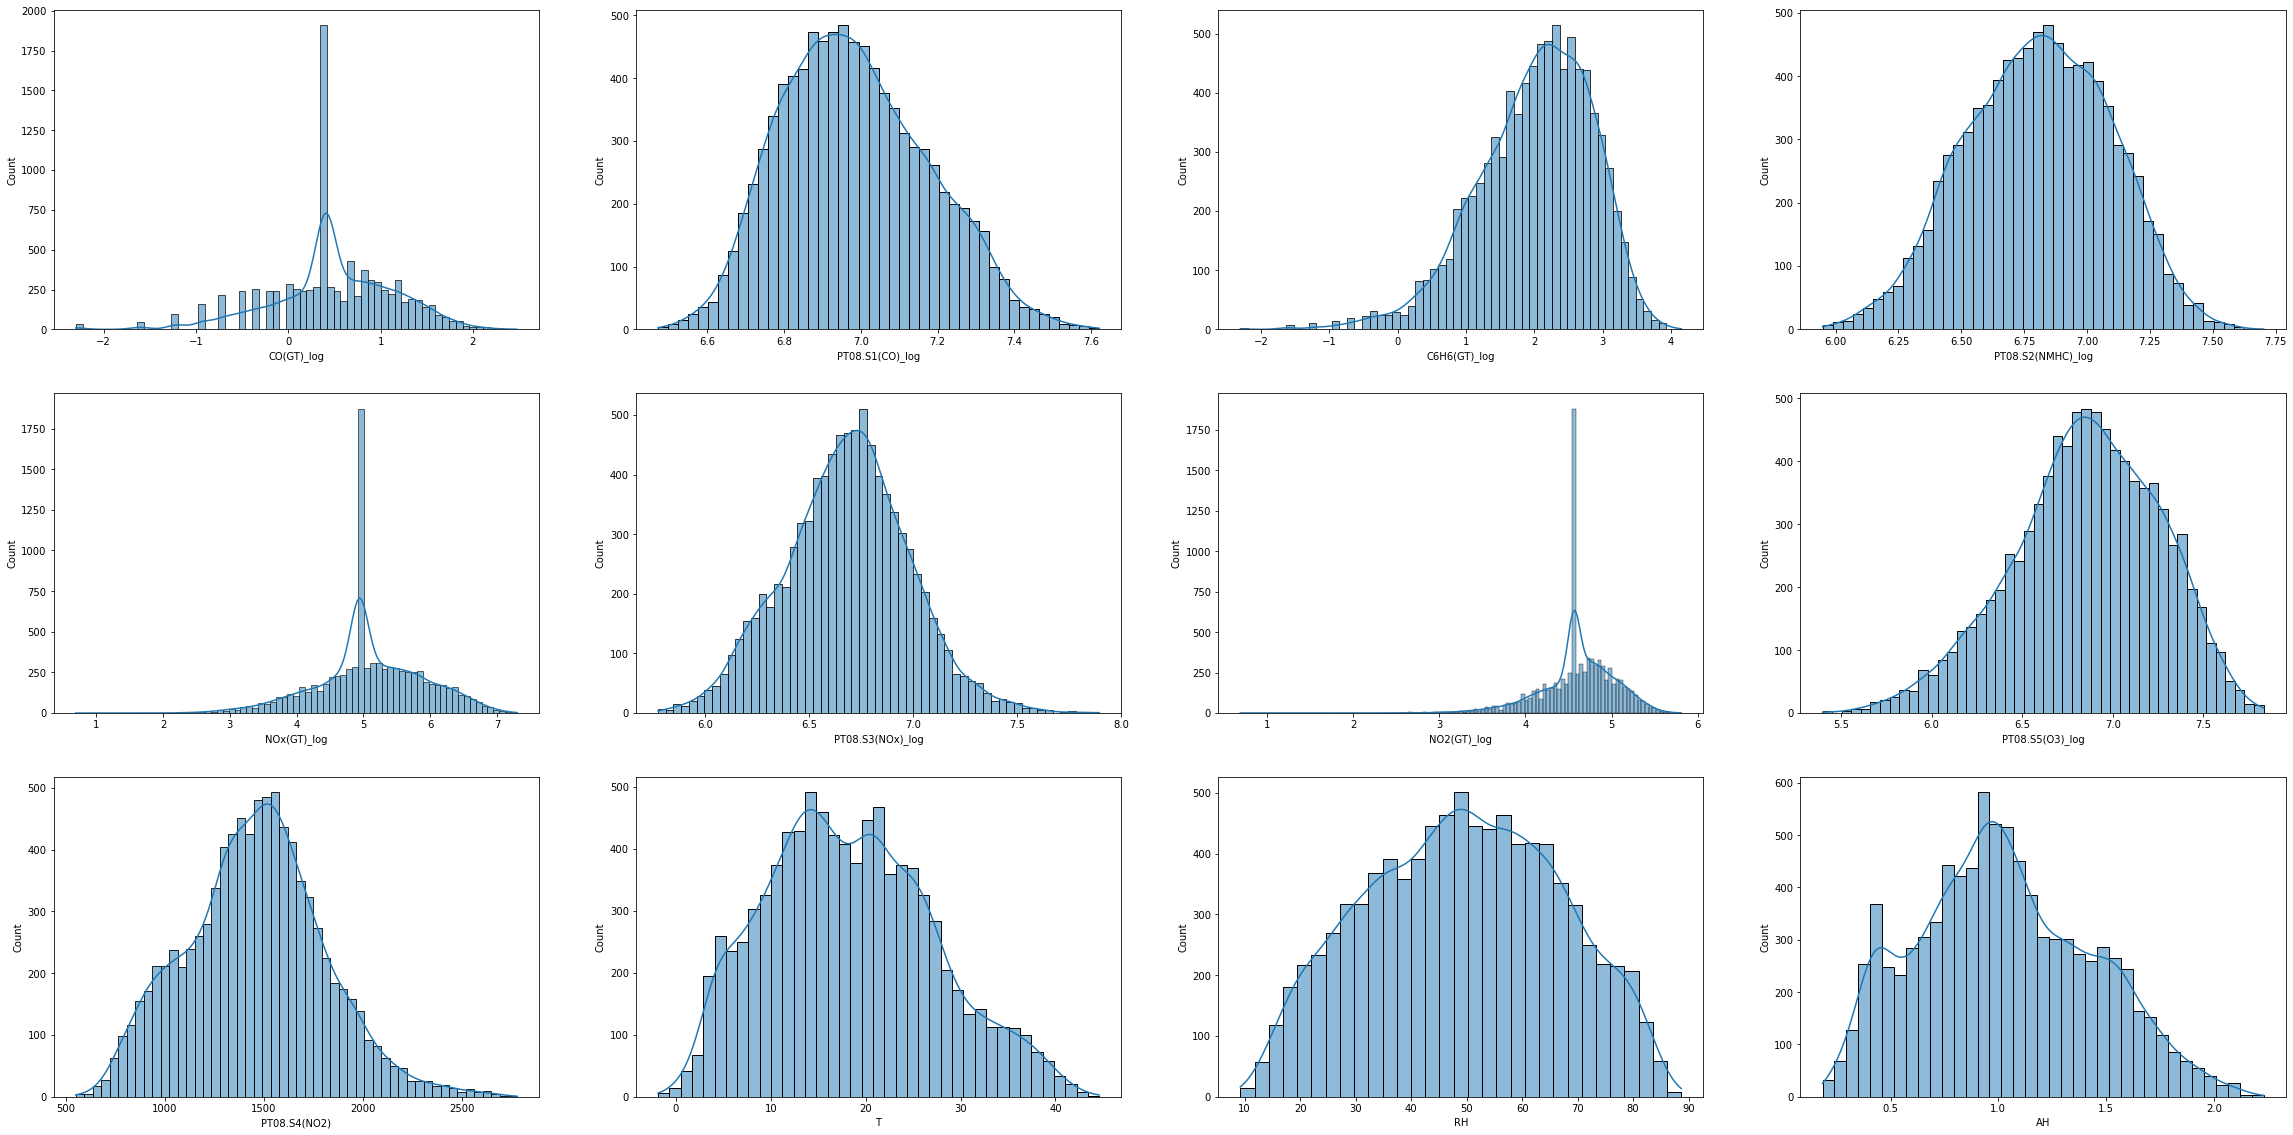

In [43]:
fig, axes = plt.subplots(3, 4, figsize=(40, 20))

for i, j in zip(floats, axes.flatten()):
    sns.histplot(x = df[i], ax=j, kde=True)

#### Final skewness

In [44]:
skewness = {i:df[i].skew() for i in floats if abs(df[i].skew()) > 0.5}
skewness

{'CO(GT)_log': -0.5147180632249653,
 'C6H6(GT)_log': -0.6594676044264542,
 'NO2(GT)_log': -0.9785371470234847}

### Correlation

#### Correlation Heatmap

<AxesSubplot:>

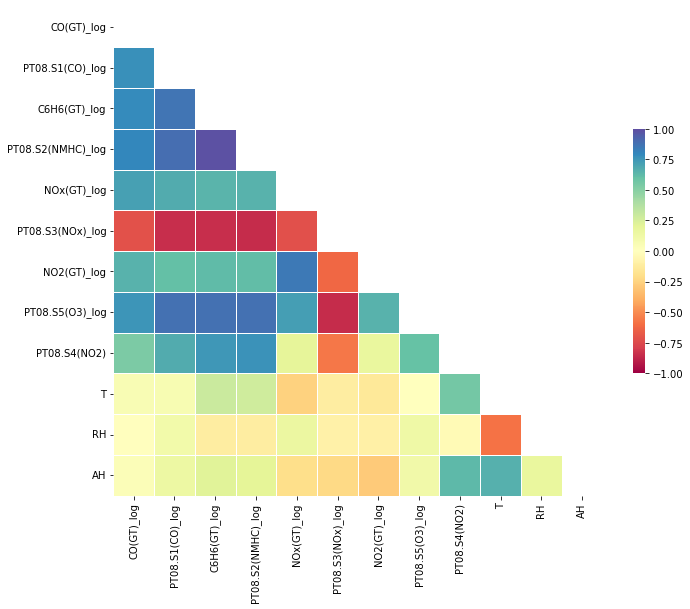

In [45]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation Table

**round2:** "round up" custom function

In [46]:
def round2(x):
    from math import ceil
    if x >= 0:
        return ceil(x*10)/10
    else:
        return round(x, 1)

**corr_label:** labels the correlation coefficients.

In [47]:
def corr_label(x):
    cl = {1:'Perfect +', 0.9:'Very strong +', 0.8:'Strong +', 0.7:'Strong +', 0.6:'Moderate +', 0.5:'Moderate +', 0.4:'Weak +', 0.3:'Weak +', 0.2:'Very weak +', 0.1:'Very weak +', 0:'No corr',
          -1:'Perfect -', -0.9:'Very strong -', -0.8:'Strong -', -0.7:'Strong -', -0.6:'Moderate -', -0.5:'Moderate -', -0.4:'Weak -', -0.3:'Weak -', -0.2:'Very weak -', -0.1:'Very weak -',}
    
    if x in cl.keys():
        return cl[x]
    else:
        return ''

**background_colors:** applies different styler functions to the correlation dataframe. Uses corr_label to assign colors to the final table.

In [48]:
def background_colors(styler):
    styler.set_caption('Correlation Coefficients Interpretation')
    styler.format(corr_label)
    styler.background_gradient(axis=None, vmin=-1, vmax=1, cmap='Spectral')
    styler.applymap(lambda x: 'background-color : white' if np.isnan(x) else '')
    return styler

In [49]:
corr = corr.applymap(round2)
corr_diag = corr.where(mask)
corr_diag.style.pipe(background_colors)

,CO(GT)_log,PT08.S1(CO)_log,C6H6(GT)_log,PT08.S2(NMHC)_log,NOx(GT)_log,PT08.S3(NOx)_log,NO2(GT)_log,PT08.S5(O3)_log,PT08.S4(NO2),T,RH,AH
CO(GT)_log,Perfect +,Strong +,Strong +,Very strong +,Strong +,Strong -,Strong +,Strong +,Moderate +,Very weak +,No corr,Very weak +
PT08.S1(CO)_log,,Perfect +,Very strong +,Very strong +,Strong +,Strong -,Strong +,Very strong +,Strong +,Very weak +,Very weak +,Very weak +
C6H6(GT)_log,,,Perfect +,Perfect +,Strong +,Strong -,Strong +,Very strong +,Strong +,Weak +,Very weak -,Weak +
PT08.S2(NMHC)_log,,,,Perfect +,Strong +,Very strong -,Strong +,Very strong +,Strong +,Weak +,Very weak -,Weak +
NOx(GT)_log,,,,,Perfect +,Strong -,Very strong +,Strong +,Very weak +,Weak -,Very weak +,Very weak -
PT08.S3(NOx)_log,,,,,,Perfect +,Moderate -,Very strong -,Moderate -,Very weak -,Very weak -,Very weak -
NO2(GT)_log,,,,,,,Perfect +,Strong +,Very weak +,Very weak -,Very weak -,Weak -
PT08.S5(O3)_log,,,,,,,,Perfect +,Moderate +,Very weak +,Very weak +,Very weak +
PT08.S4(NO2),,,,,,,,,Perfect +,Moderate +,No corr,Strong +
T,,,,,,,,,,Perfect +,Moderate -,Strong +


### Outliers

#### Visualizing Outliers

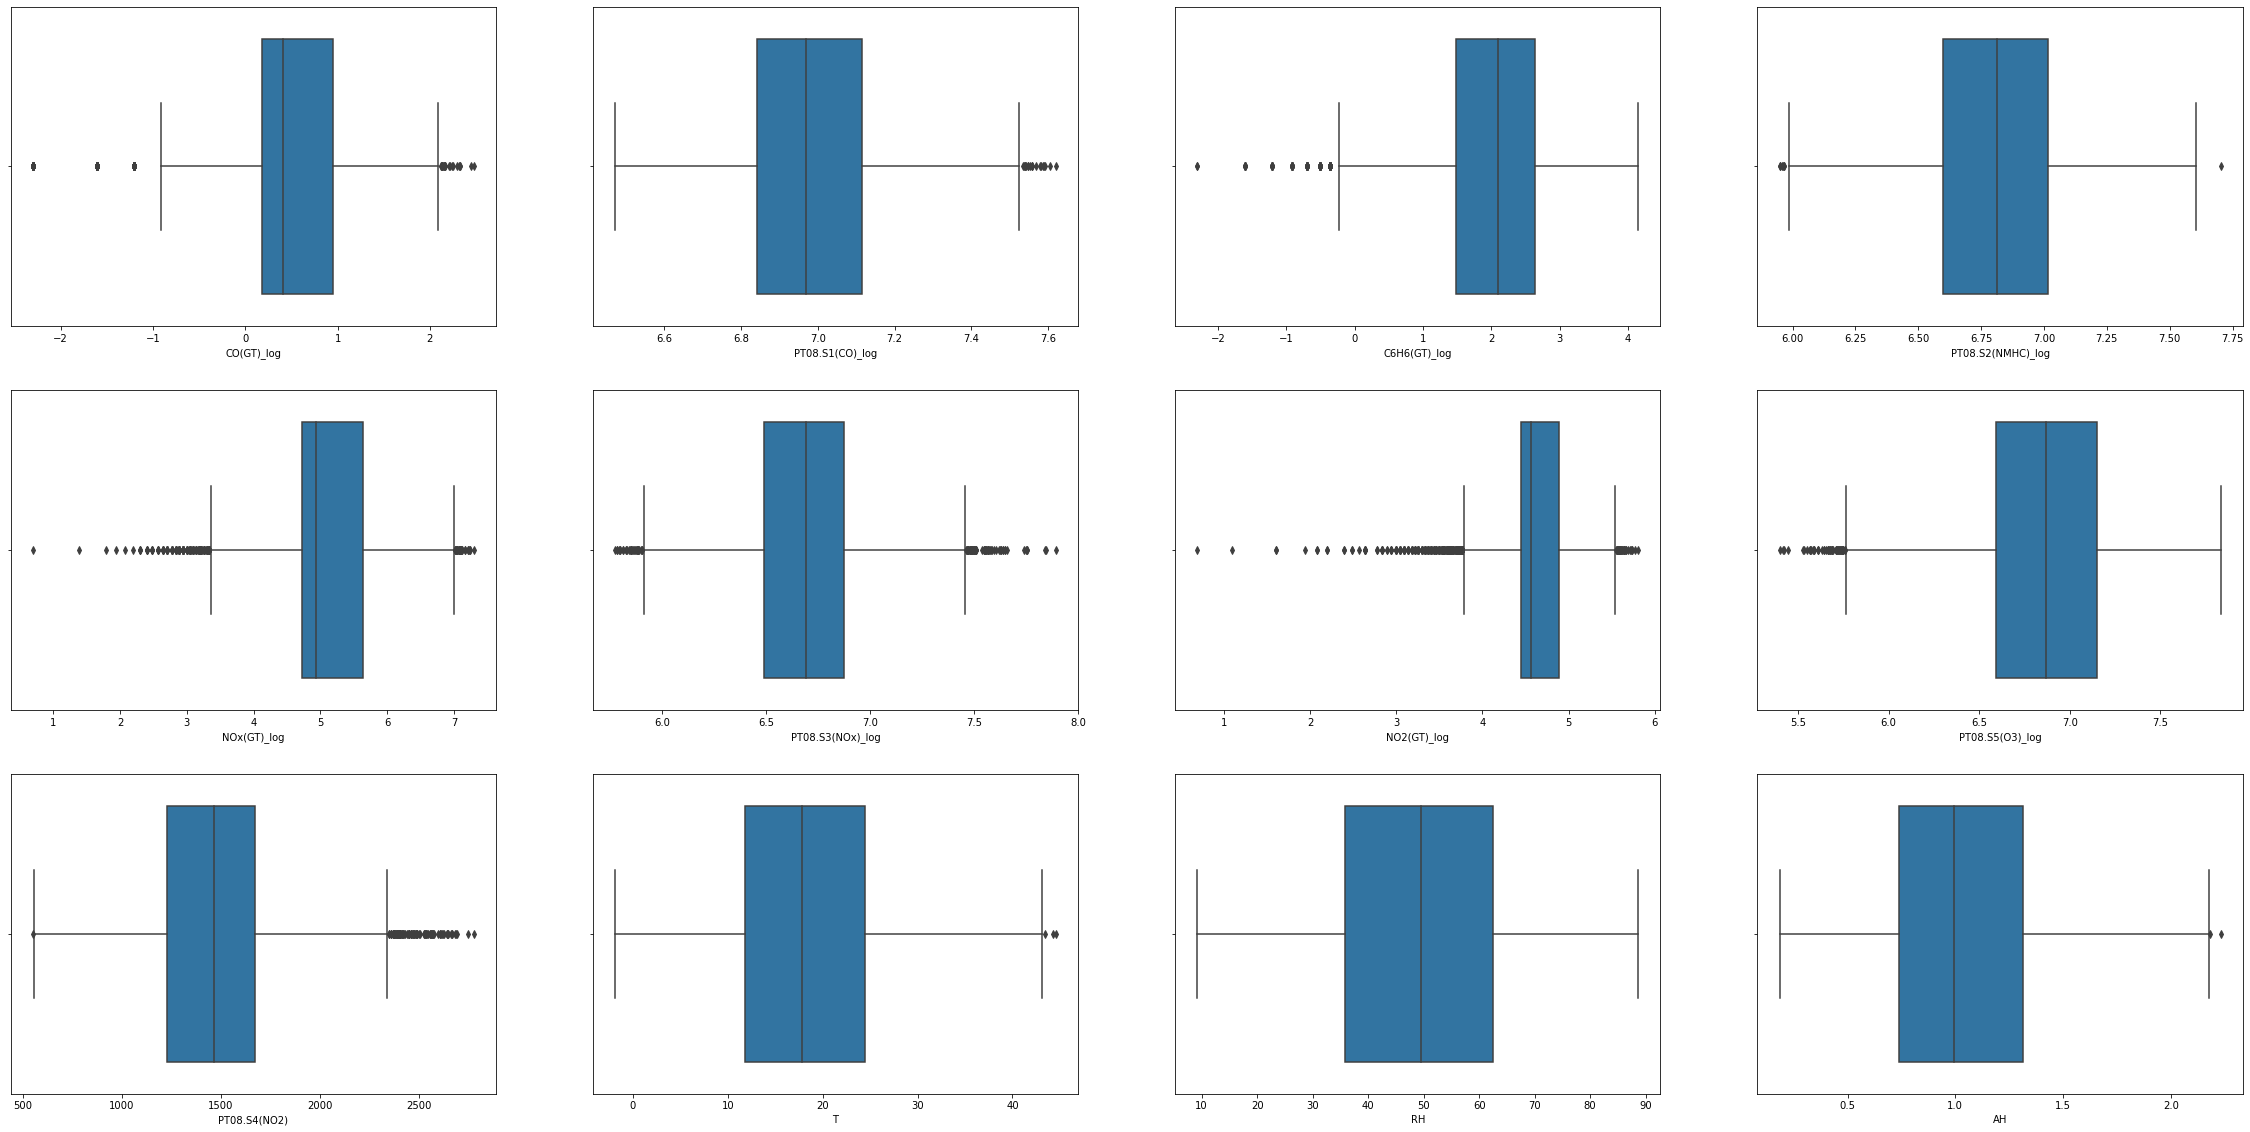

In [50]:
fig, axes = plt.subplots(3, 4, figsize=(40, 20))

for i, j in zip(floats, axes.flatten()):
    sns.boxplot(x = df[i], ax=j, whis=1.5)

#### Identifying outliers with z-score

In [51]:
from scipy import stats

In [52]:
# Identify values > 2.698, which means they are outside of a normal distribution's 99.66% interval.
max_value = 2.698
outliers_idx = {} # Dictionary with column name and index of the outliers
outliers_n = {} # Dictionary with column name number of outliers
outliers_mask = {} # Dictionary with column name and mask of the outliers

for i in floats:
    z_score = stats.zscore(df[i])
    mask = abs(z_score) > max_value 
    idx = df[mask].index.tolist()
    if len(idx) != 0:
        outliers_idx[i] = idx
        outliers_n[i] = len(idx)
        outliers_mask[i] = mask

In [53]:
outliers_n

{'CO(GT)_log': 84,
 'PT08.S1(CO)_log': 36,
 'C6H6(GT)_log': 108,
 'PT08.S2(NMHC)_log': 27,
 'NOx(GT)_log': 65,
 'PT08.S3(NOx)_log': 70,
 'NO2(GT)_log': 138,
 'PT08.S5(O3)_log': 54,
 'PT08.S4(NO2)': 77,
 'T': 12,
 'AH': 10}

#### Visualizing Outliers in relationship with **AH**

In [54]:
plot_data = df.copy()

In [55]:
for i in outliers_mask.keys():
    x = outliers_mask[i].apply(lambda x: 'Outlier' if x else 'Normal')
    plot_data[i + '_outlier'] = x

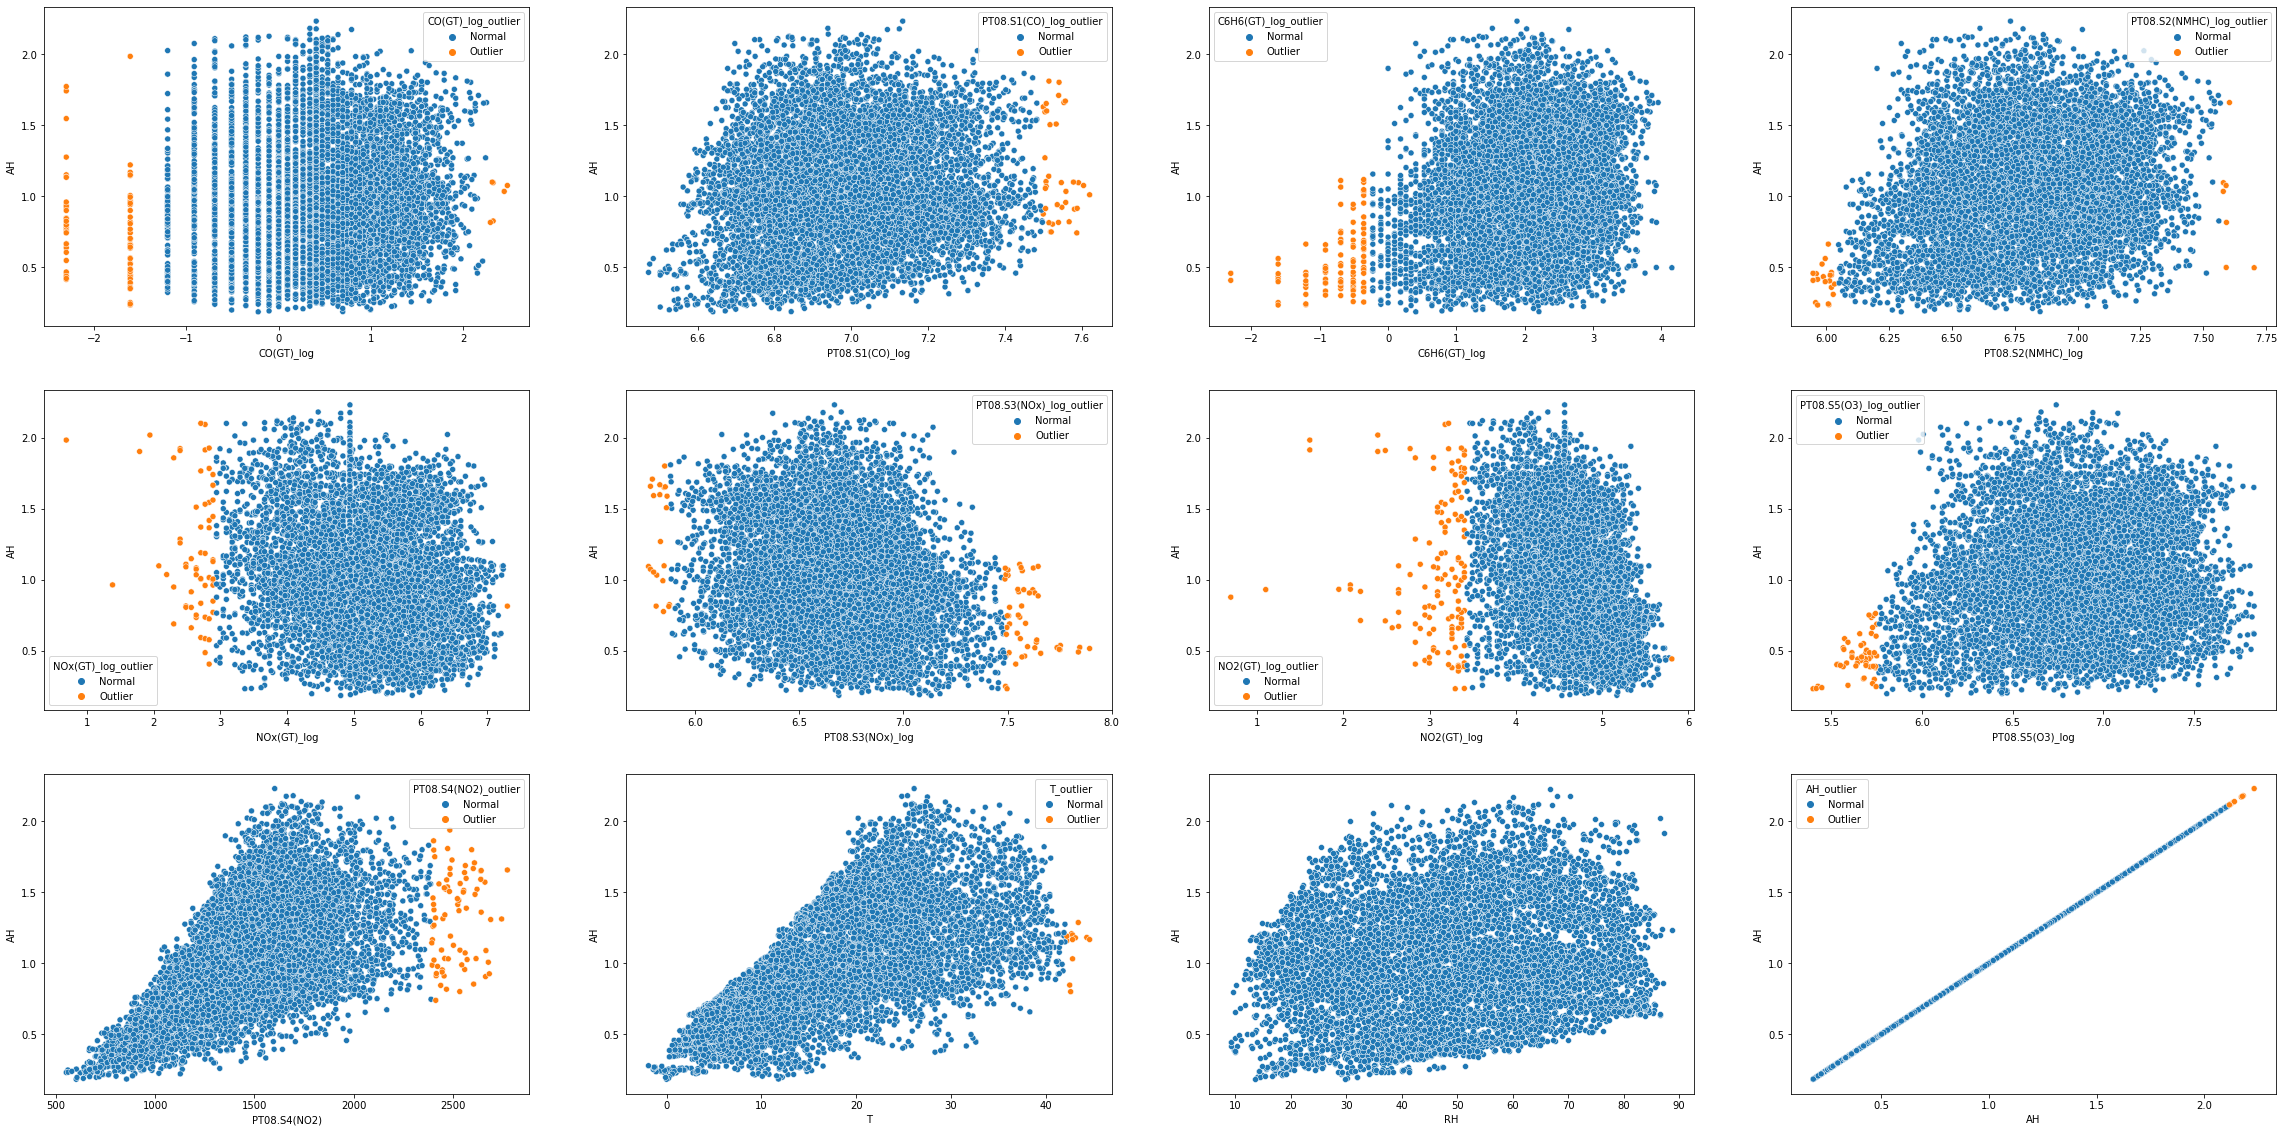

In [56]:
fig, axes = plt.subplots(3, 4, figsize=(40, 20))

for i, j in zip(floats, axes.flatten()):
    if i + '_outlier' in plot_data.columns:
        sns.scatterplot(data=plot_data, x=i, y='AH', ax=j, hue=i + '_outlier')
    else:
        sns.scatterplot(data=plot_data, x=i, y='AH', ax=j)

There is not a good reason to eliminate or replace these outliers as they could represent actual measurements of odd atmospheric conditions.

### Reset index

In [57]:
df = df.reset_index(drop = True)

## Exploratory Data Analysis

- During Data Cleaning the type 'float64' data was explored.
- There is room to explore the relationship between **DateTime** and the target feature **AH**

### Creating extra features based on **DateTime**

In [58]:
df['Year'] = df['DateTime'].dt.year
df['Month_number'] = df['DateTime'].dt.month
df['Month'] = df['DateTime'].dt.month_name()
df['Day_number'] = df['DateTime'].dt.weekday
df['Day'] = df['DateTime'].dt.day_name()
df['Time'] = df['DateTime'].dt.hour

In [59]:
for i in ['Time', 'Day', 'Day_number', 'Month', 'Month_number', 'Year']:
    cols.insert(1, i)

In [60]:
df = df[cols]

In [61]:
df.head()

,DateTime,Year,Month_number,Month,Day_number,Day,Time,CO(GT)_log,PT08.S1(CO)_log,C6H6(GT)_log,PT08.S2(NMHC)_log,NOx(GT)_log,PT08.S3(NOx)_log,NO2(GT)_log,PT08.S5(O3)_log,PT08.S4(NO2),T,RH,AH
0,2004-10-03 18:00:00,2004,10,October,6,Sunday,18,0.955511,7.215240,2.476538,6.952729,5.111988,6.962243,4.727388,7.145196,1692.0,13.6,48.9,0.7578
1,2004-10-03 19:00:00,2004,10,October,6,Sunday,19,0.693147,7.163947,2.240710,6.861711,4.634729,7.068172,4.521789,6.879356,1559.0,13.3,47.7,0.7255
2,2004-10-03 20:00:00,2004,10,October,6,Sunday,20,0.788457,7.245655,2.197225,6.844815,4.875197,7.038784,4.736198,6.979145,1555.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,2004,10,October,6,Sunday,21,0.788457,7.226936,2.219203,6.854355,5.147494,6.995766,4.804021,7.092574,1584.0,11.0,60.0,0.7867
4,2004-10-03 22:00:00,2004,10,October,6,Sunday,22,0.470004,7.148346,1.871802,6.728629,4.875197,7.094235,4.753590,7.012115,1490.0,11.2,59.6,0.7888


### Hour of the day

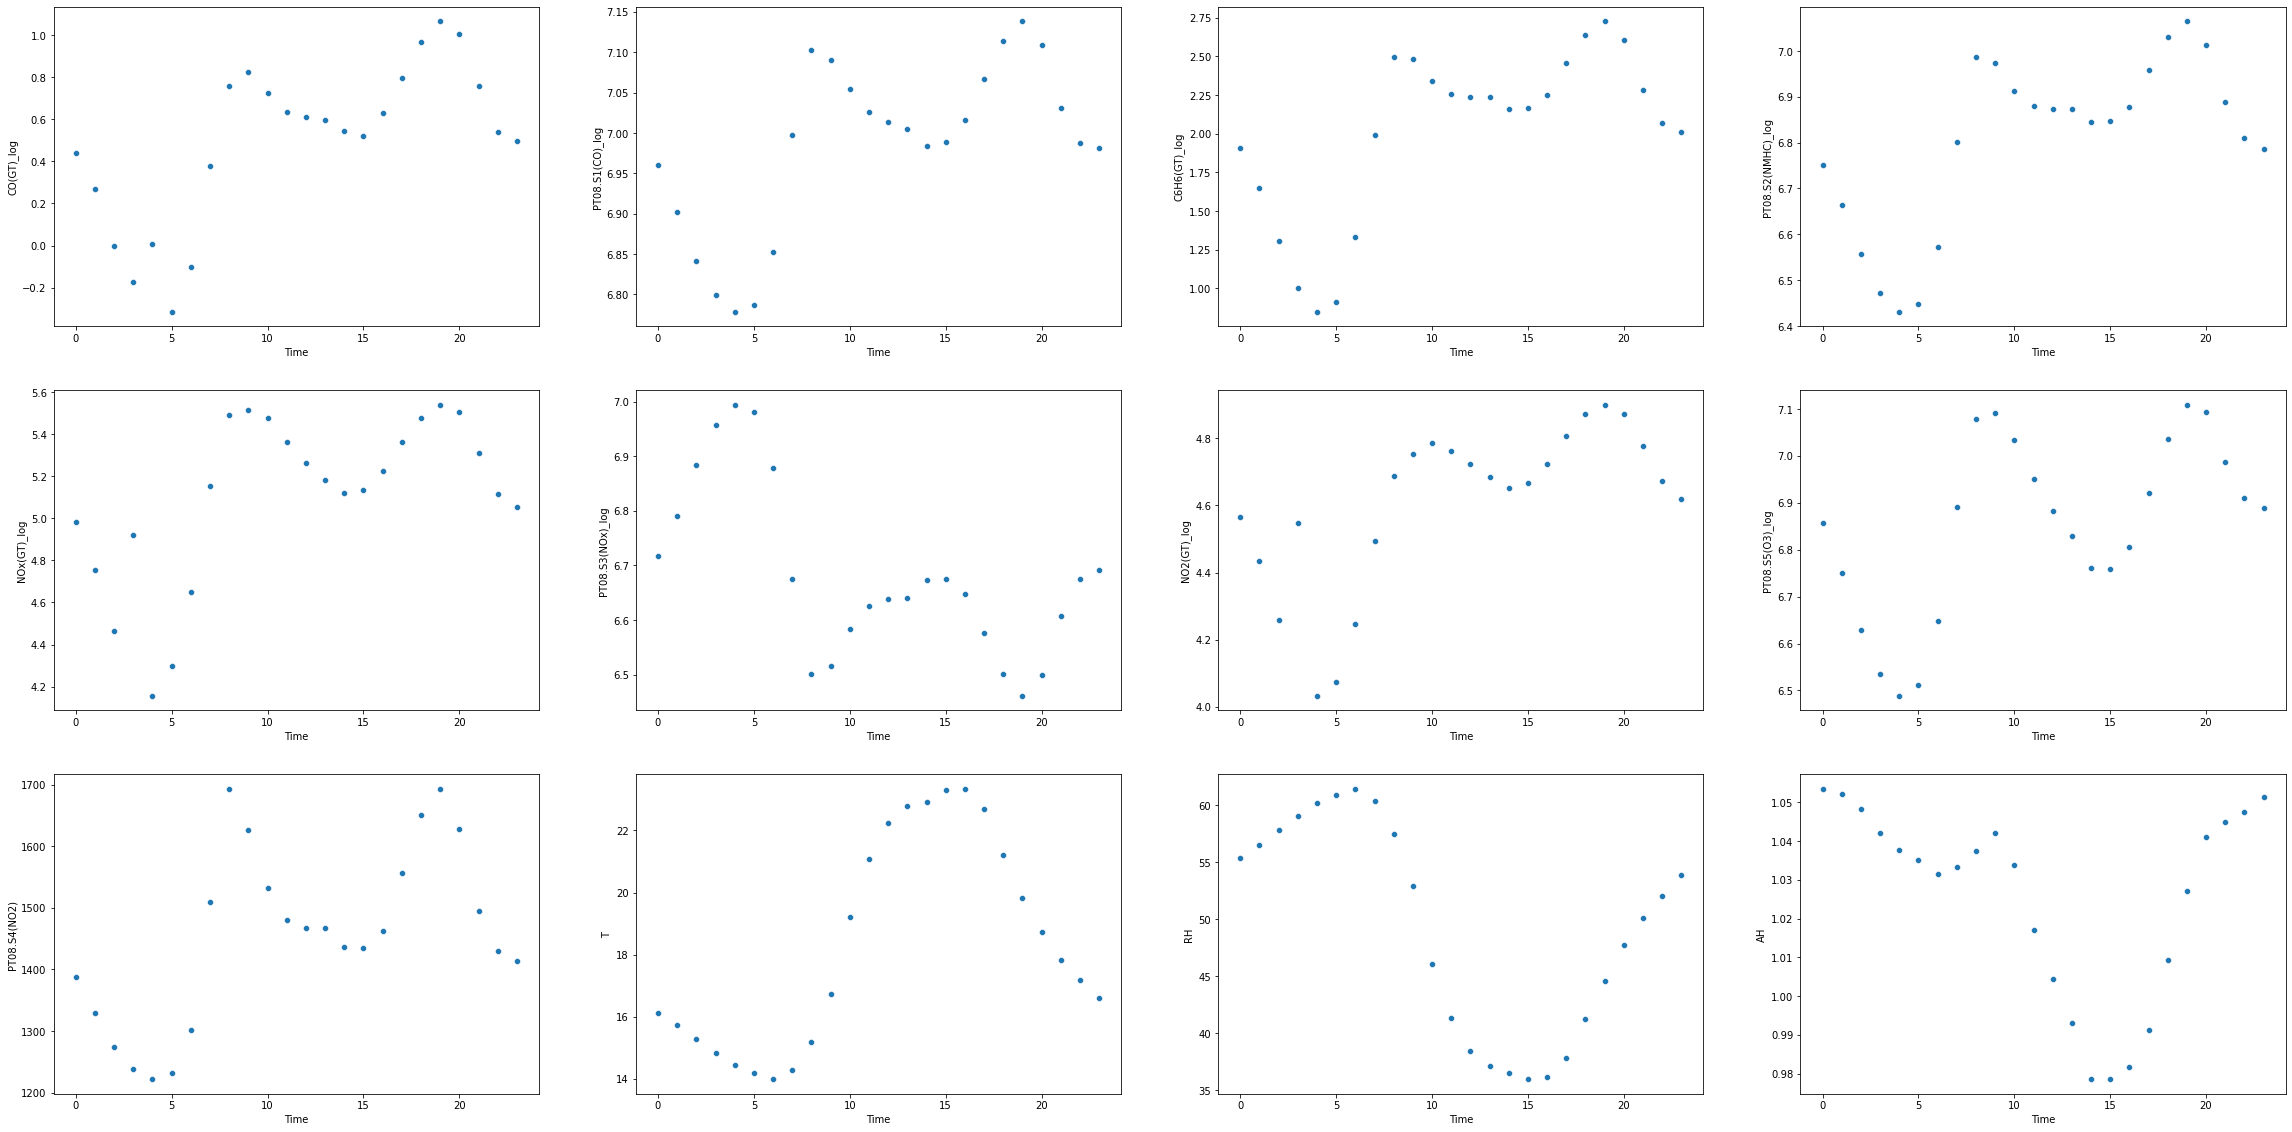

In [62]:
plot_data = df.groupby('Time').mean()
fig, axes = plt.subplots(3, 4, figsize=(40, 20))

for i, j in zip(floats, axes.flatten()):
    sns.scatterplot(data=plot_data, x=plot_data.index, y=i, ax=j)

### Day

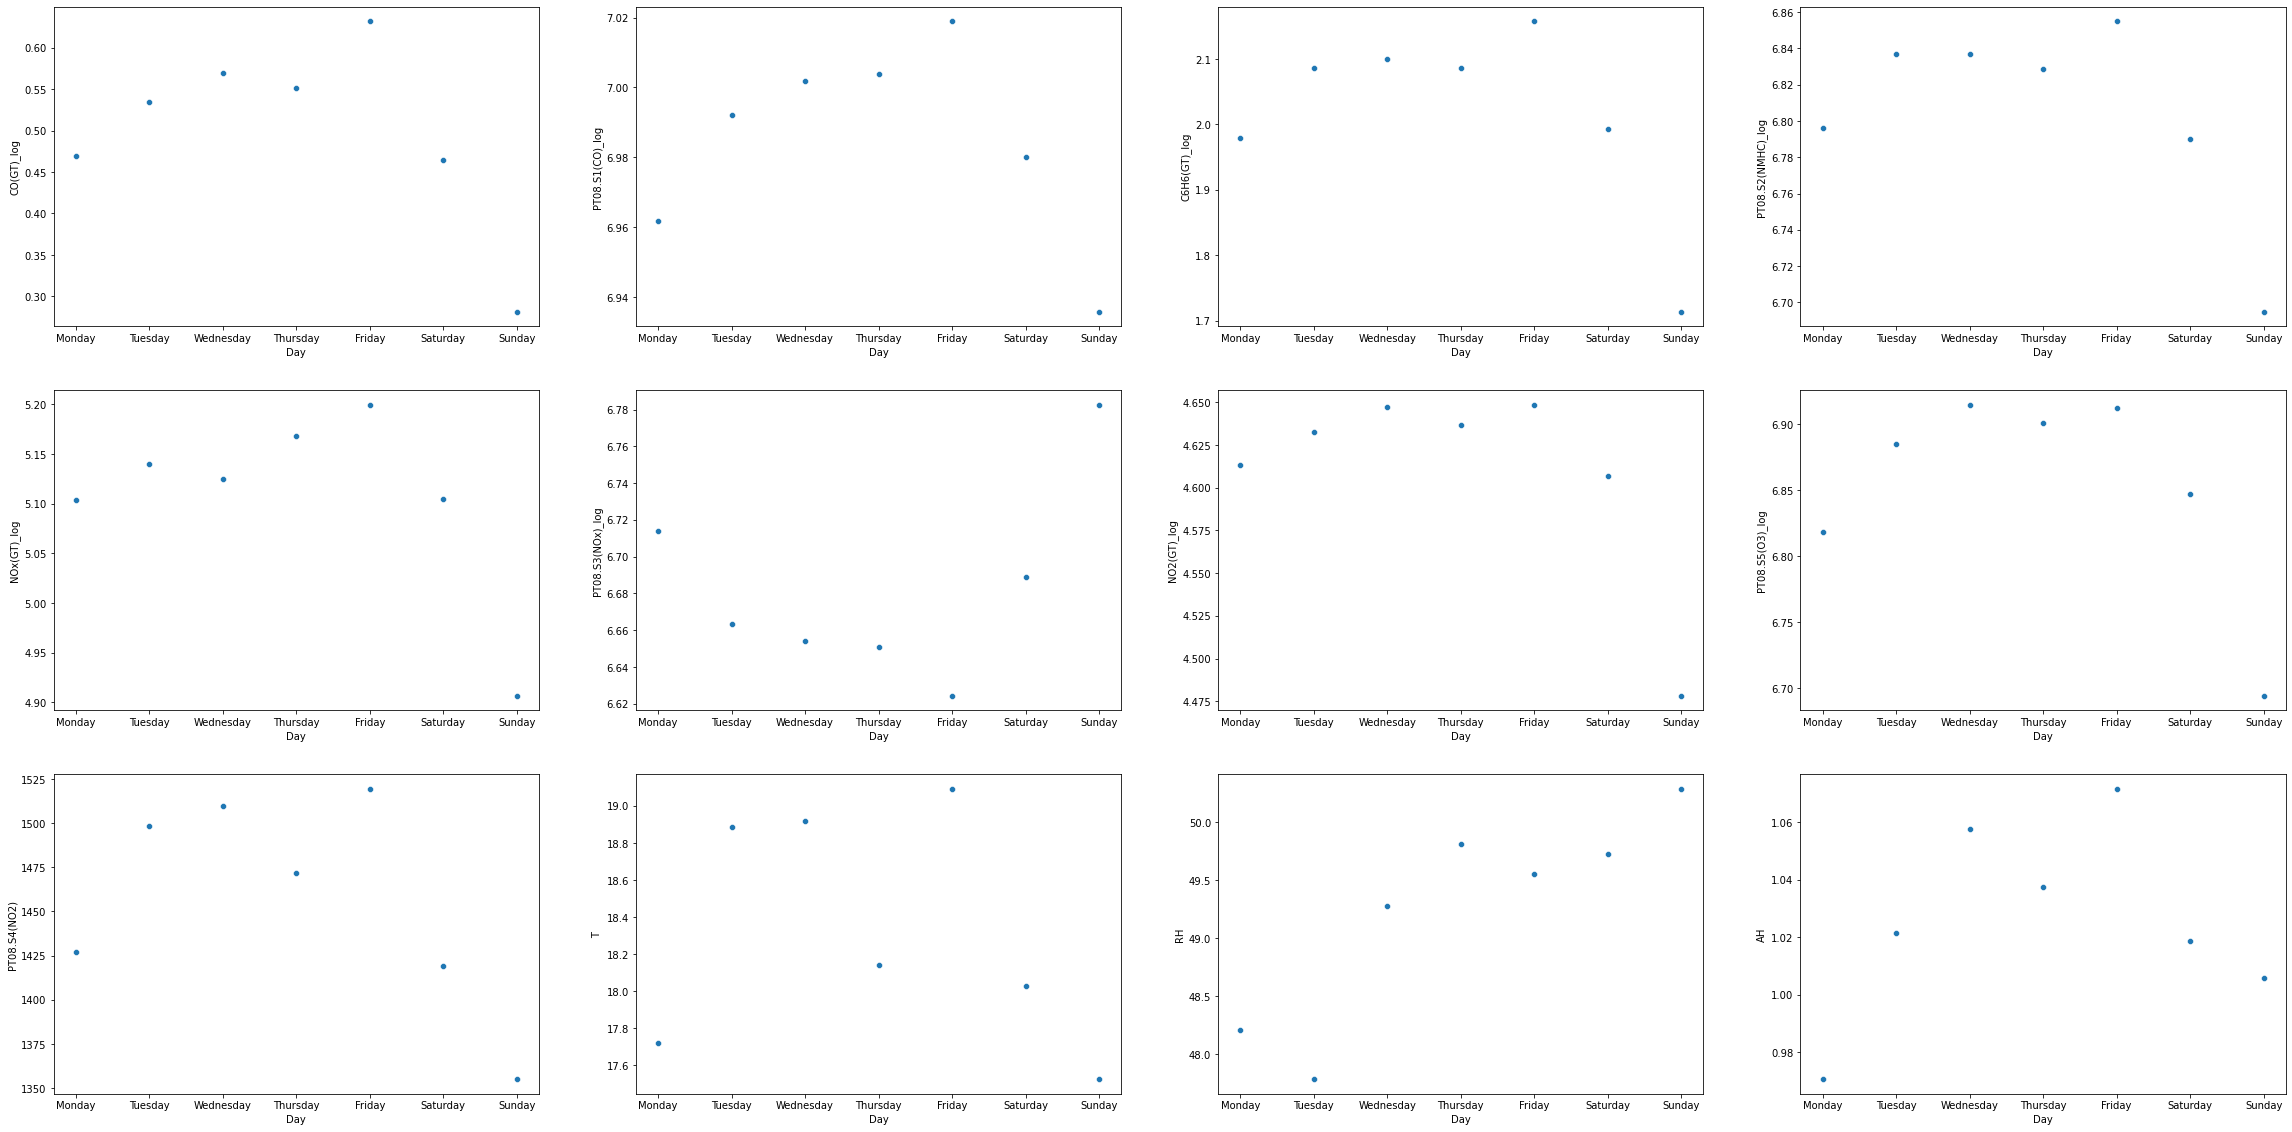

In [63]:
plot_data = df.groupby('Day').mean().sort_values(by=['Day_number'])
fig, axes = plt.subplots(3, 4, figsize=(40, 20))

for i, j in zip(floats, axes.flatten()):
    sns.scatterplot(data=plot_data, x=plot_data.index, y=i, ax=j)

### Month

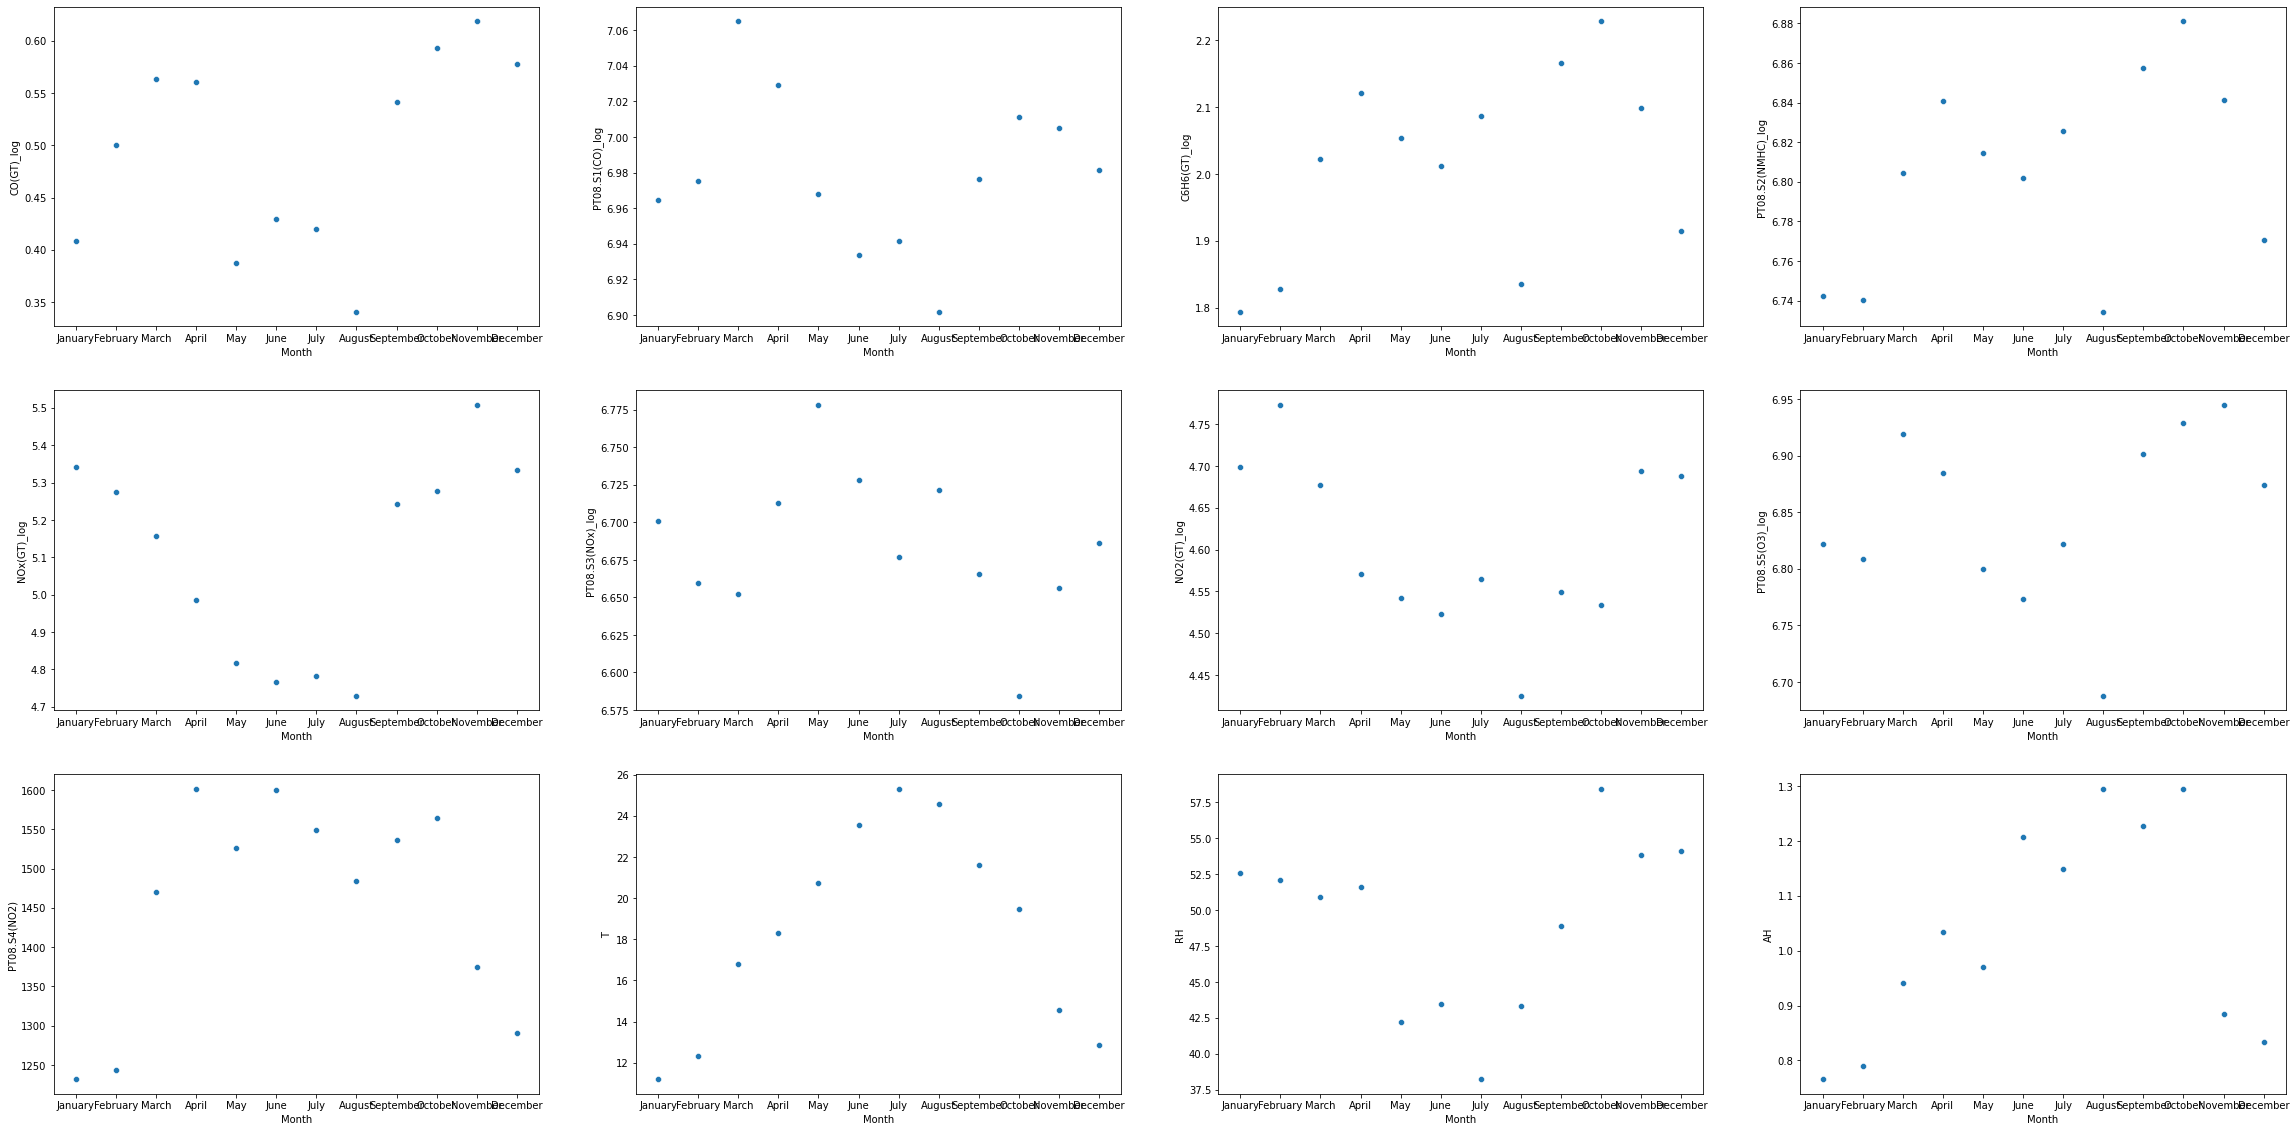

In [64]:
plot_data = df.groupby('Month').mean().sort_values(by=['Month_number'])
fig, axes = plt.subplots(3, 4, figsize=(40, 20))

for i, j in zip(floats, axes.flatten()):
    sns.scatterplot(data=plot_data, x=plot_data.index, y=i, ax=j)

## Linear Regressions

### Train - test split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
model_data = df[floats]
X = model_data.loc[:, model_data.columns != 'AH']
y = model_data.loc[:, ['AH']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

### Standard Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = scaler.fit_transform(X_train), scaler.fit_transform(X_test), scaler.fit_transform(y_train), scaler.fit_transform(y_test)

### Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
LR = LinearRegression()
LR.fit(X_train_scaled, y_train_scaled)
y_pred_LR = LR.predict(X_test_scaled)

In [72]:
# The coefficients
print("Coefficients: \n", LR.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_scaled, y_pred_LR))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_scaled, y_pred_LR))

Coefficients: 
 [[ 0.00300218 -0.14911758  0.32878084 -0.79624649  0.10840324 -0.33824768
  -0.12836889  0.034987    0.40950173  0.86609686  0.58772322]]
Mean squared error: 0.09
Coefficient of determination: 0.91


### Ridge

In [73]:
from sklearn.linear_model import RidgeCV

In [74]:
R = RidgeCV(alphas=np.logspace(-6, 6, 13))
R.fit(X_train_scaled, y_train_scaled)
y_pred_R = R.predict(X_test_scaled)

In [75]:
# The alpha
print("Alpha:", R.alpha_)
# The coefficients
print("Coefficients: \n", R.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_scaled, y_pred_R))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_scaled, y_pred_R))

Alpha: 1.0
Coefficients: 
 [[ 0.00272561 -0.14987687  0.31544919 -0.77860947  0.1064908  -0.3370972
  -0.12721609  0.03526347  0.40647234  0.86747818  0.58927345]]
Mean squared error: 0.09
Coefficient of determination: 0.91


### LASSO

In [76]:
from sklearn.linear_model import LassoCV

In [77]:
L = LassoCV(alphas=np.logspace(-6, 6, 13))
L.fit(X_train_scaled, np.ravel(y_train_scaled))
y_pred_L = L.predict(X_test_scaled)

In [78]:
# The alpha
print("Alpha:", L.alpha_)
# The coefficients
print("Coefficients: \n", L.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_scaled, y_pred_L))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_scaled, y_pred_L))

Alpha: 0.0001
Coefficients: 
 [ 0.00241312 -0.14903806  0.31217652 -0.77394329  0.10538639 -0.33661497
 -0.12622859  0.03472224  0.40507574  0.8683578   0.5901511 ]
Mean squared error: 0.09
Coefficient of determination: 0.91


### Visualization

In [79]:
plot_data = pd.DataFrame({'Real Value':np.ravel(y_test_scaled), 'Linear Regression':np.ravel(y_pred_LR), 'Ridge':np.ravel(y_pred_R), 'LASSO':y_pred_L})

In [80]:
plot_data = pd.melt(plot_data, id_vars=['Real Value'], value_vars=['Linear Regression', 'Ridge', 'LASSO'], var_name= 'Linear Model', value_name='Predicted Value')

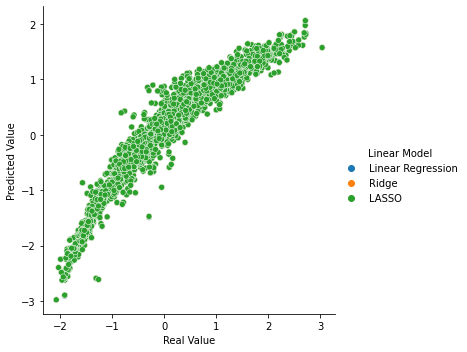

In [81]:
sns.relplot(data=plot_data, x='Real Value', y='Predicted Value', hue='Linear Model')

## Key Findings

- Most of the numeric vairiables are approximately normally distributed. A linear regression model is fit to analyze the data.
- There are clear temporal patterns in the data
- A simple regression model can predict the data to a 90% $R^{2}$ with $MSE = 0.09$
- The are not substantial differences between the results of a simple linean regression, and L1 and L2 regularizations.
- **T** and **RH** are the features with the strongest coefficients. It makes sense, because these features can be theoretically associated with **AH** with thermodynamics.
- **CO(GT)_log** and **PT08.S5(O3)_log** are the features that contribute the least to any of the linear regressions.

## Possible Flaws

- It is possible to do a Time Series analysis.
- The data could be cleaned further with technical information about the sensors used.

## Author

Nicolas Hernandez

In [86]:
!jupyter nbconvert --to webpdf --allow-chromium-download RegressionProject-NicolasHernandez.ipynb

[NbConvertApp] Converting notebook RegressionProject-NicolasHernandez.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2161163 bytes to RegressionProject-NicolasHernandez.pdf
